# Analiza matematyczna z zastosowaniami 1

## Ćwiczenia w sali komputerowej nr 3

### Przygotowanie do pracy

Uzupełnij poniższą zmienną `IMIE_NAZWISKO` swoim imieniem i nazwiskiem, a następnie ją uruchom - dzięki temu sprawdzisz, czy kernel Pythona działa poprawnie.

In [186]:
IMIE_NAZWISKO = "Daniel Stodulski"

print(IMIE_NAZWISKO)

Daniel Stodulski


Załadujmy niezbędne biblioteki:

In [187]:
import numpy as np
import pandas as pd

import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

plt.rcParams.update({
    'font.size': 14,
    'axes.titlesize': 18,
    'axes.labelsize': 16,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'legend.fontsize': 14
})

Podczas implementacji nie korzystaj z gotowych funkcji SciPy zawartych w module `scipy.optimize` - podczas zajęć będziemy chcieli zaimplementować algorytmy od podstaw. Pod koniec materiałów pokażemy jak można je wykorzystać.

### Metody numerycznego rozwiązywania równań

Wiele problemów z różnych dziedzin nauki i techniki może być formułowanych jako

$$ f(x) = 0 $$

gdzie zmienne $x$ oraz $f(x)$ mogą być rzeczywiste lub zespolone, a także skalarne lub wektorowe. Podczas zajęć skoncentrujemy się głównie na przypadku gdy $x$ oraz $f(x)$ są rzeczywiste i skalarne. Wartość $x$, która spełnia powyższe równanie, nazywana jest pierwiastkiem równania lub miejscem zerowym funkcji $f(x)$. Na przykład równanie kwadratowe $ x^2 - 3x + 2 = 0 $ ma pierwiastki równe 1 i 2.

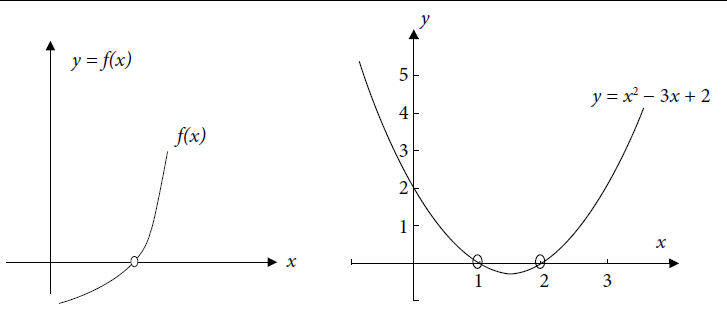

Równania nieliniowe można ogólnie podzielić na dwie grupy, tj. równania wielomianowe oraz równania transcendentne.

**Równania wielomianowe**

Równania wielomianowe są podane przez:

$$ y = f(x) = a_nx^n + a_{n-1}x^{n-1} + \ldots + a_1x + a_0 = 0 $$

Powyżej mamy podane ogólne równanie wielomianowe stopnia $n$-tego, które ma dokładnie $n$ pierwiastków. Pierwiastki te mogą być rzeczywiste lub zespolone. Poniżej mamy kilka przykładów równań wielomianowych:

* $ 3x^3 + x^2 - 9 = 0 $
* $ x^2 - 4x - 5 = 0 $

**Równania transcendentne**

Równanie, które nie jest równaniem wielomianowym, to równanie transcendentne (w języku polskim nazywa się je równoważnie [*równaniem przestępnym*](https://pl.wikipedia.org/wiki/R%C3%B3wnanie_przest%C4%99pne)). Równania te obejmują funkcje trygonometryczne, eksponencjalne i logarytmiczne. Poniżej mamy kilka przykładów takich równań:

* $ 3\sin(x) - e^{-x} = 0 $
* $ 3x^2 - 2\cos(x) = 0 $
* $ 2e^x \sin(x) - \ln(x) = 0 $

----

Patrząc szerzej na sposoby rozwiązywania równania $f(x) = 0$, możemy je podzielić na kilka grup, tj. metody:

1. bezpośrednie analityczne,
2. graficzne,
3. prób i błędów,
4. iteracyjne.

Równania transcendentne mogą mieć skończoną lub nieskończoną liczbę rzeczywistych pierwiastków; mogą też ich nie mieć wcale. Rozwiązanie prostych równań jest stosunkowo łatwe metodami bezpośrednimi, ale w przypadku równań wyższych rzędów i równań transcendentnych nie ma ogólnej analitycznej metody do wyznaczania dokładnych pierwiastków. W tym celu można stosować techniki numeryczne do znajdowania przybliżonych pierwiastków równania. Dla skomplikowanych i złożonych równań, metody iteracyjne są najlepszymi sposobami znajdowania numerycznych przybliżeń pierwiastków równania $f(x) = 0$.

W dalszej części materiałów skoncentrujemy się na pojedynczych równaniach transcendentnych z jedną zmienną i zaimplementujemy kolejno poniższe klasyczne metody:

1. bisekcji (połowienia),
2. *regula falsi*,
3. siecznych (cięciw),
4. stycznych (Newtona-Raphsona),
5. Müllera.

Dodajmy również, że w przypadku równań wielomianowych można wykorzystać metodę Laguerre'a, ale jest to poza zakresem tych zajęć.

Patrząc na poszczególne algorytmy iteracyjne, które będziemy implementować, możemy wyodrębnić ich kilka własności, np.:

1. liczba punktów startowych,
2. rząd zbieżności $p$.

Dodatkowo podczas implementacji będziemy musieli zwrócić uwagę na kryterium stopu. We wszystkich metodach iteracyjnych będzie ono polegało na sprawdzeniu czy:

1. ostatnie dwie iteracje dają taki sam wynik z dokładnością do podanego miejsca dziesiętnego $\epsilon$,
2. wartość funkcji $f(x)$ jest bliska zeru ze wskazanym poziomem precyzji $\delta$,
3. liczba wykonanych interacji algorytmu przekroczyła maksymalną dozwoloną liczbę iteracji $i_{\max}$.

Miejsce zerowe funkcji możemy w dalszej części oznaczać jako $\xi$.

#### Metoda bisekcji (połowienia)

Metoda bisekcji jest najprostszą metodą iteracyjną do znajdowania rzeczywistych pierwiastków równania $f(x) = 0$. Metoda opiera się na stosowaniu [twierdzenia Darboux wartości pośredniej](https://pl.wikipedia.org/wiki/Twierdzenie_Darboux), a rząd zbieżności wynosi $p=1$.

Potrzebujemy dwóch początkowych punktów, $a$ i $b$, które obejmują pierwiastek, tj. by wartości $f(a)$ i $f(b)$ miały różne znaki. Pierwsze przybliżenie pierwiastka to środek przedziału $(a, b)$, czyli:

$$ x_0 = \frac{a + b}{2} $$

Jeżeli wartości $f(a)$ i $f(x_0)$ są tego samego znaku, to przedział przeszukiwania zawęża się poprzez przyjęcie $a=x_0$ . Podobnie, jeżeli wartości $f(x_0)$ i $f(b)$ mają ten sam znak, to zawężenie przedziału przeszukiwania następuje w wyniku przyjęcia $b = x_0$. Postępując identycznie, w drugiej iteracji oblicza się $x_1 = \dfrac{a + b}{2}$ oraz wartość funkcji $f(x_1)$ i wykonuje się analizę i konstrukcję kolejnej postaci przedziału $(a, b)$ jak wcześniej. Oczywiście musimy również pamiętać o warunkach stopu.

Poniższy wykres przedstawia uproszczoną ideę metody bisekcji:

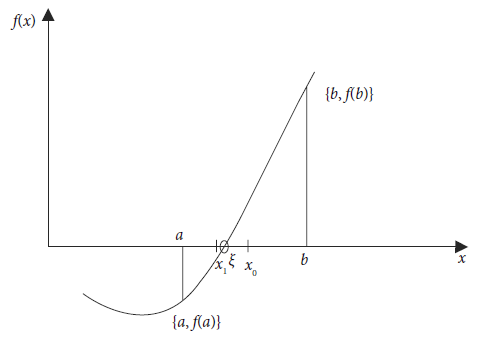

##### Zadanie 1 (2 pkt.)

Zaimplementuj poniższą funkcję `bisection()`. Zwróć uwagę, że funkcja ma zwrócić nie tylko wynik końcowy, ale również wartości pośrednie i pomocnicze podczas wykonywania poszczególnych iteracji algorytmu. Dodatkowo należy zaimplementować rzucenie wyjątku gdy algorytm:

* nie może zostać uruchomiony (np. `Function has same signs at a = 2 and b = 4`),
* lub przekroczy maksymalną liczbę iteracji $i_{\max}$ (np. `Maximum number of iterations imax = 100 exceeded`).

Przypadek testowy:

```python
f    = lambda x: np.power(x, 3) - 3 * x + 1
a    = 0.0
b    = 1.0

results = bisection(f, a, b)
print(pd.DataFrame(results))
```

Oczekiwany wynik:

```plaintext
     i         a      f(a)         b      f(b)       x_i        f(x_i)
0    0  0.000000  1.000000  1.000000 -1.000000  0.500000 -3.750000e-01
1    1  0.000000  1.000000  0.500000 -0.375000  0.250000  2.656250e-01
2    2  0.250000  0.265625  0.500000 -0.375000  0.375000 -7.226562e-02
3    3  0.250000  0.265625  0.375000 -0.072266  0.312500  9.301758e-02
4    4  0.312500  0.093018  0.375000 -0.072266  0.343750  9.368896e-03
5    5  0.343750  0.009369  0.375000 -0.072266  0.359375 -3.171158e-02
6    6  0.343750  0.009369  0.359375 -0.031712  0.351562 -1.123571e-02
7    7  0.343750  0.009369  0.351562 -0.011236  0.347656 -9.493232e-04
8    8  0.343750  0.009369  0.347656 -0.000949  0.345703  4.205830e-03
9    9  0.345703  0.004206  0.347656 -0.000949  0.346680  1.627262e-03
10  10  0.346680  0.001627  0.347656 -0.000949  0.347168  3.387210e-04
11  11  0.347168  0.000339  0.347656 -0.000949  0.347412 -3.053632e-04
12  12  0.347168  0.000339  0.347412 -0.000305  0.347290  1.666335e-05
13  13  0.347290  0.000017  0.347412 -0.000305  0.347351 -1.443538e-04
14  14  0.347290  0.000017  0.347351 -0.000144  0.347321 -6.384621e-05
15  15  0.347290  0.000017  0.347321 -0.000064  0.347305 -2.359167e-05
16  16  0.347290  0.000017  0.347305 -0.000024  0.347298 -3.464222e-06
17  17  0.347290  0.000017  0.347298 -0.000003  0.347294  6.599549e-06
18  18  0.347294  0.000007  0.347298 -0.000003  0.347296  1.567660e-06
19  19  0.347296  0.000002  0.347298 -0.000003  0.347297 -9.482819e-07
```

In [188]:
def bisection(f: callable, a: float, b: float, eps: float = 1e-6, delta: float = 1e-6, imax: int = 100) -> dict:
    """
    Perform the bisection method for finding the root of a function.

    Parameters:
        - f (callable): The function for which the root is to be found.
        - a (float): The starting point of the interval.
        - b (float): The ending point of the interval.
        - eps (float): The tolerance for convergence, defining the precision 
                       for comparing two consecutive iterations.
        - delta (float): The tolerance for convergence, defining the level of 
                         precision at which the function value f(x) is close to zero.
        - imax (int): The maximum number of iterations allowed.
        
    Returns:
        - dict: A dictionary containing the results of each iteration. The keys are the following lists:
            - 'i': The iteration number.
            - 'a': The value of 'a'.
            - 'f(a)': The value of f(a).
            - 'b': The value of 'b'.
            - 'f(b)': The value of f(b).
            - 'x_i': The midpoint of 'a' and 'b'; next interval endpoint.
            - 'f(x_i)': The value of f(x_i).

        Raises:
        - Exception: If the function has the same signs at 'a' and 'b'
                     or the algorithm exceeds 'imax' limit.
    """
    
    results = {
        "i": [],
        "a": [],
        "f(a)": [],
        "b": [],
        "f(b)": [],
        "x_i": [],
        "f(x_i)": []
    }

    # UMIEŚĆ SWÓJ KOD TUTAJ

    fa = f(a)
    fb = f(b)

    if np.sign(fa) == np.sign(fb):
        raise Exception(f"Function has same signs at a = {a} and b = {b}")
    
    for i in range(imax):
        x_i = (a + b) / 2
        fx = f(x_i)
        results["i"].append(i)
        results["a"].append(a)
        results["f(a)"].append(fa)
        results["b"].append(b)
        results["f(b)"].append(fb)
        results["x_i"].append(x_i)
        results["f(x_i)"].append(fx)

        if abs(fx) < delta or abs(b - a) / 2 < eps:
            return results

        if np.sign(fa) * np.sign(fx) < 0:
            b = x_i
            fb = fx
        else:
            a = x_i
            fa = fx

        if(i >= imax): raise Exception(f"Maximum number of iterations imax = {imax} exceeded")

    return results

Po zaimplementowaniu możemy skorzystać z poniżego kodu pomocniczego, który wizualizuje kolejne kroki algorytmu:

In [189]:
def show_results_bisection(f, results, title):
    def plot_bisection(i, show_trace):
        x_l = results['a'][0]
        x_r = results['b'][0]
        x_margin = np.abs(x_r - x_l)*0.1
        
        x_all = np.linspace(x_l-x_margin, x_r+x_margin, 100)
        y_all = f(x_all)
        
        y_d = np.min(y_all)
        y_u = np.max(y_all)
        if y_d > y_u:
            y_d, y_u = y_u, y_d
        y_margin = np.abs(y_u - y_d)*0.1

        a = results['a'][i]
        fa = results['f(a)'][i]
        b = results['b'][i]
        fb = results['f(b)'][i]
        x_i = results['x_i'][i]
        f_x_i = results['f(x_i)'][i]
        
        x = np.linspace(a, b, 100)
        y = f(x)
        
        plt.figure(figsize=(10, 8))
        plt.axhline(0, color='black', linewidth=0.5, zorder=1)
        plt.plot(x_all, y_all, color="black", linewidth=0.75, linestyle='--', label='$f(x)$', zorder=2)
        plt.plot(x, y, color="tab:green", zorder=3)
        plt.scatter(a, fa, color='tab:orange', s=100, label=f'($a$, $f(a)$) = ({a:+.3f}, {fa:+.3f})', zorder=5)
        plt.scatter(b, fb, color='tab:blue',  s=100, label=f'($b$, $f(b)$) = ({b:+.3f}, {fb:+.3f})', zorder=5)
        plt.scatter(x_i, f_x_i, color='tab:red',    s=100, label='($x_{'+f'{i}'+'}$, $f(x_{'+f'{i}'+'})$)'+f' = ({x_i:+.3f}, {f_x_i:+.3f})', zorder=5)
        plt.axvline(x_i, color='tab:red', linestyle='--', zorder=5)
        if show_trace and i > 0:
            for j in range(1, i + 1):
                x_old = results['a'][j-1]
                fx_old = results['f(a)'][j-1]
                if x_old ==  results['a'][j]:
                    x_old = results['b'][j-1]
                    fx_old = results['f(b)'][j-1]
                plt.scatter(x_old, fx_old, color='tab:gray', alpha=(1.0 - j/(len(results['a'])-1))/2, s=100, zorder=4)
        plt.title(f'Bisection method for {title}')
        plt.xlabel('$x$')
        plt.ylabel('$f(x)$')
        plt.xlim(x_l - x_margin, x_r + x_margin)
        plt.ylim(y_d - y_margin, y_u + y_margin)
        plt.legend(prop=FontProperties(family='monospace'), loc='upper left', bbox_to_anchor=(1, 1))
        plt.show()

    i_slider = widgets.IntSlider(min=0, max=len(results['i'])-1, step=1, description='Iteration i:')
    trace_checkbox=widgets.Checkbox(value=False, description='Show trace', disabled=False, indent=True)
    interactive_plot = widgets.interactive(plot_bisection, i=i_slider, show_trace=trace_checkbox)
    display(interactive_plot)

In [190]:
f    = lambda x: np.power(x, 3) - 3 * x + 1
a    = 0.0
b    = 1.0

results = bisection(f, a, b)
show_results_bisection(f, results, "$f(x) = x^3 - 3x + 1$")

interactive(children=(IntSlider(value=0, description='Iteration i:', max=19), Checkbox(value=False, descriptio…

#### *Regula falsi*

Podobnie jak metoda bisekcji, metoda fałszywej reguły (łac. *regula falsi*) również wymaga dwóch punktów początkowych, $a$ i $b$, które swoim zakresem obejmują miejsce zerowe, a rząd zbieżności tak jak poprzednio również wynosi $p = 1$. Niech pierwiastek równania $f(x) = 0$ leży w przedziale $[a; b]$ i niech funkcja $f(x)$ będzie funkcją ciągłą. Następne kolejne przybliżenie to punkt przecięcia prostej łączącej dwa punkty $(a, f(a))$ i $(b, f(b))$ na osi $x$ - stad też wzięła się nazwa tej metody, gdyż punkt przecięcia daje "fałszywą pozycję" miejsca zerowego funkcji. Równanie prostej łączącej dwa punkty $(a, f(a))$ i $(b, f(b))$ wygląda następująco:

$$
y - f(b) = \frac{f(b) - f(a)}{b - a} (x - b)
$$

Niech $x_0$ będzie punktem przecięcia powyższej prostej i osi $x$. W punkcie $x = x_0$ równanie to można uprościć do następującej postaci:

$$
-f(b) = \frac{f(b) - f(a)}{b - a} (x_0 - b)
$$

$$
x_0 = \frac{a f(b) - b f(a)}{f(b) - f(a)}
$$

Zatem $ x_0 $ jest przybliżeniem miejsca zerowego. Kontynuujemy działanie algorytmu z nowym przedziałem, który obejmuje pierwiastek równania. Jeśli $ f(a) f(x_0) < 0 $, to pierwiastek będzie leżał w przedziale $(a, x_0)$, więc kolejne przybliżenie jest dane przez

$$
x_1 = \frac{a f(x_0) - x_0 f(a)}{f(x_0) - f(a)}
$$

a w przeciwnym razie w $(x_0, b)$

$$
x_1 = \frac{x_0 f(b) - b f(x_0)}{f(b) - f(x_0)}
$$

Kontynuujemy powyższy proces generując sekwencję $ x_1, x_2, x_3, \ldots $ tak długo, aż nie osiągniemy kryterium stopu.

Poniższy wykres przedstawia uproszczoną ideę metody *regula falsi*:

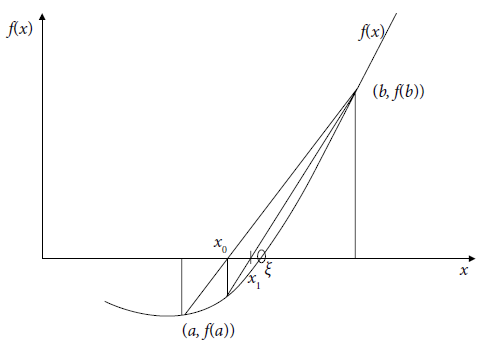

##### Zadanie 2 (1 pkt.)

Zaimplementuj poniższą funkcję `regula_falsi()`. Zwróć uwagę na funkcja ma zwrócić nie tylko wynik końcowy, ale również wartości pośrednie i pomocnicze podczas wykonywania poszczególnych iteracji algorytmu. Dodatkowo należy zaimplementować rzucenie wyjątku gdy algorytm:

* nie może zostać uruchomiony (np. `Function has same signs at a = 2 and b = 4`),
* lub przekroczy maksymalną liczbę iteracji $i_{\max}$ (np. `Maximum number of iterations imax = 100 exceeded`).

Przypadek testowy:

```python
f    = lambda x: np.power(x, 3) - 3 * x + 1
a    = -1.5
b    = 1.5

results = regula_falsi(f, a, b)
print(pd.DataFrame(results))
```

Oczekiwany wynik:

```plaintext
   i         a      f(a)         b      f(b)       x_i        f(x_i)
0  0 -1.500000  2.125000  1.500000 -0.125000  1.333333 -6.296296e-01
1  1 -1.500000  2.125000  1.333333 -0.629630  0.685714 -7.347172e-01
2  2 -1.500000  2.125000  0.685714 -0.734717  0.124162  6.294293e-01
3  3  0.124162  0.629429  0.685714 -0.734717  0.383267 -9.350151e-02
4  4  0.124162  0.629429  0.383267 -0.093502  0.349755 -6.480357e-03
5  5  0.124162  0.629429  0.349755 -0.006480  0.347456 -4.216468e-04
6  6  0.124162  0.629429  0.347456 -0.000422  0.347307 -2.731621e-05
7  7  0.124162  0.629429  0.347307 -0.000027  0.347297 -1.769172e-06
8  8  0.124162  0.629429  0.347297 -0.000002  0.347296 -1.145807e-07
```

In [191]:
def regula_falsi(f: callable, a: float, b: float, eps: float = 1e-6, delta: float = 1e-6, imax: int = 100) -> dict:
    """
    Perform the regula falsi method for finding the root of a function.

    Parameters:
        - f (callable): The function for which the root is to be found.
        - a (float): The left endpoint for the chord.
        - b (float): The right endpoint for the chord.
        - eps (float): The tolerance for convergence, defining the precision 
                       for comparing two consecutive iterations.
        - delta (float): The tolerance for convergence, defining the level of 
                         precision at which the function value f(x) is close to zero.
        - imax (int): The maximum number of iterations allowed.

    Returns:
        - dict: A dictionary containing the results of each iteration. The keys are the following lists:
            - "i": The iteration number.
            - "a": The value of left endpoint for the chord.
            - "f(a)": The value of f(a).
            - "b": The value of right endpoint for the chord.
            - "f(b)": The value of f(b).
            - "x_i": The value of next endpoint for the chord.
            - "f(x_i)": The value of f(x_i).
            
    Raises:
        - Exception: If the function has the same signs at 'a' and 'b'
                     or the algorithm exceeds 'imax' limit.
    """

    results = {
        "i": [],
        "a": [],
        "f(a)": [],
        "b": [],
        "f(b)": [],
        "x_i": [],
        "f(x_i)": []
    }
    
    # UMIEŚĆ SWÓJ KOD TUTAJ
    fa = f(a)
    fb = f(b)

    if np.sign(fa) == np.sign(fb):
        raise Exception(f"Function has same signs at a = {a} and b = {b}")

    for i in range(imax):
        x_i = (a * fb - b * fa) / (fb - fa)
        fx = f(x_i)

        results["i"].append(i)
        results["a"].append(a)
        results["f(a)"].append(fa)
        results["b"].append(b)
        results["f(b)"].append(fb)
        results["x_i"].append(x_i)
        results["f(x_i)"].append(fx)

        if abs(fx) < delta or abs(b - a) < eps:
            return results

        if np.sign(fa) * np.sign(fx) < 0:
            b = x_i
            fb = fx
        else:
            a = x_i
            fa = fx

        if(i >= imax): raise Exception(f"Maximum number of iterations imax = {imax} exceeded")
    return results

Po zaimplementowaniu możemy skorzystać z poniżego kodu pomocniczego, który wizualizuje kolejne kroki algorytmu:

In [192]:
def show_results_regula_falsi(f, results, title):
    def plot_regula_falsi(i, show_trace):
        x_l = results['a'][0]
        x_r = results['b'][0]
        x_margin = np.abs(x_r - x_l)*0.1

        x_all = np.linspace(x_l-x_margin, x_r+x_margin, 100)
        y_all = f(x_all)
        
        y_d = np.min(y_all)
        y_u = np.max(y_all)
        if y_d > y_u:
            y_d, y_u = y_u, y_d
        y_margin = np.abs(y_u - y_d)*0.1

        a = results['a'][i]
        fa = results['f(a)'][i]
        b = results['b'][i]
        fb = results['f(b)'][i]
        x_i = results['x_i'][i]
        f_x_i = results['f(x_i)'][i]
        
        x = np.linspace(a, b, 100)
        y = f(x)
        
        plt.figure(figsize=(10, 8))
        plt.axhline(0, color='black', linewidth=0.5, zorder=1)
        plt.plot(x_all, y_all, color="black", linewidth=0.75, linestyle='--', label='$f(x)$', zorder=2)
        plt.plot(x, y, color="tab:green", zorder=3)
        plt.plot((a, b), (fa, fb), color='tab:red', linestyle='--')
        plt.plot((x_i, x_i), (0, f_x_i), color='tab:red', linestyle='--')
        plt.scatter(a, fa, color='tab:orange', s=100, label=f'($a$, $f(a)$) = ({a:+.3f}, {fa:+.3f})', zorder=5)
        plt.scatter(b, fb, color='tab:blue',  s=100, label=f'($b$, $f(b)$) = ({b:+.3f}, {fb:+.3f})', zorder=5)
        plt.scatter(x_i, f_x_i, color='tab:red',    s=100, label='($x_{'+f'{i}'+'}$, $f(x_{'+f'{i}'+'})$)'+f' = ({x_i:+.3f}, {f_x_i:+.3f})', zorder=5)
        if show_trace and i > 0:
            for j in range(1, i + 1):
                x_old = results['a'][j-1]
                fx_old = results['f(a)'][j-1]
                if x_old ==  results['a'][j]:
                    x_old = results['b'][j-1]
                    fx_old = results['f(b)'][j-1]
                plt.scatter(x_old, fx_old, color='tab:gray', alpha=(1.0 - j/(len(results['a'])-1))/2, s=100, zorder=4)
        plt.title(f'Regula falsi method for {title}')
        plt.xlabel('$x$')
        plt.ylabel('$f(x)$')
        plt.xlim(x_l - x_margin, x_r + x_margin)
        plt.ylim(y_d - y_margin, y_u + y_margin)
        plt.legend(prop=FontProperties(family='monospace'), loc='upper left', bbox_to_anchor=(1, 1))
        plt.show()

    i_slider = widgets.IntSlider(min=0, max=len(results['i'])-1, step=1, description='Iteration i:')
    trace_checkbox=widgets.Checkbox(value=False, description='Show trace', disabled=False, indent=True)
    interactive_plot = widgets.interactive(plot_regula_falsi, i=i_slider, show_trace=trace_checkbox)
    display(interactive_plot)

In [193]:
f    = lambda x: np.power(x, 3) - 3 * x + 1
a    = -1.5
b    = 1.5

results = regula_falsi(f, a, b)
show_results_regula_falsi(f, results, "$f(x) = x^3 - 3x + 1$")

interactive(children=(IntSlider(value=0, description='Iteration i:', max=8), Checkbox(value=False, description…

#### Metoda siecznych (cięciw)

W tej metodzie postępujemy podobnie jak w przypadku *regula falsi*, tzn. przybliżamy naszą funkcję $f(x)$ za pomocą prostej łączącej dwa punkty na krzywej, ale nie korzystamy z tw. o wartości pośredniej dla dwóch kolejnych punktów przybliżenia miejsca zerowego. Rząd zbieżności tej metody wynosi $p=1.618$.

Różnica polega na tym, że w metodzie *regula falsi* zastępowaliśmy jeden z dwóch aktualnie rozważanych końców przedziału $[a, b]$, które *de facto* były przybliżeniami miejsca zerowego. Natomiast w metodzie siecznych zawsze zastępujemy drugi najstarszy punkt nowym przybliżeniem. W metodzie siecznych może się zdarzyć, że przedział wyznaczony przez dwa kolejne przybliżenia nie będzie obejmował miejsca zerowego.

Niech $x_0$ i $x_1$ będą dwoma początkowymi przybliżeniami (w *regula falsi* było to odpowiednio $a$ i $b$). Kolejne przybliżenie jest następujące:

$$
x_2 = \frac{x_0 f(x_1) - x_1 f(x_0)}{f(x_1) - f(x_0)}
$$

Następnie, używamy $x_1$ i $x_2$ do obliczenia $x_3$:

$$
x_3 = \frac{x_1 f(x_2) - x_2 f(x_1)}{f(x_2) - f(x_1)}
$$

Podobnie, $x_4$ jest dane przez:

$$
x_4 = \frac{x_2 f(x_3) - x_3 f(x_2)}{f(x_3) - f(x_2)}
$$

Zauważmy, że kolejne przybliżenie jest obliczane przy użyciu dwóch ostatnich przybliżeń.

Uogólniając, jeśli $x_{n-1}$ i $x_n$ to dwa przybliżenia w dowolnym kroku, wówczas kolejne przybliżenie jest dane równaniem cięciwy łączącej te dwa punkty $(x_{n-1}, f(x_{n-1}))$ i $(x_n, f(x_n))$:

$$
x_{n+1} = \frac{x_{n-1} f(x_n) - x_n f(x_{n-1})}{f(x_n) - f(x_{n-1})}
$$

gdzie $n = 1, 2, 3, \ldots$

Poniższy wykres przedstawia uproszczoną ideę metody siecznych:

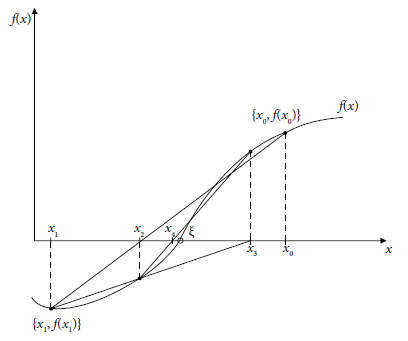

##### Zadanie 3 (1 pkt.)

Zaimplementuj poniższą funkcję `secant()`. Zwróć uwagę na funkcja ma zwrócić nie tylko wynik końcowy, ale również wartości pośrednie i pomocnicze podczas wykonywania poszczególnych iteracji algorytmu. Dodatkowo należy zaimplementować rzucenie wyjątku gdy algorytm:

* przekroczy maksymalną liczbę iteracji $i_{\max}$ (np. `Maximum number of iterations imax = 100 exceeded`).

Przypadek testowy:

```python
f    = lambda x: np.power(x, 3) - 3 * x + 1
x_0  = 0.5
x_1  = 2.0

results = secant(f, x_0, x_1)
print(pd.DataFrame(results))
```

Oczekiwany wynik:

```plaintext
   i       x_i        f(x_i)
0  0  0.500000 -3.750000e-01
1  1  2.000000  3.000000e+00
2  2  0.666667 -7.037037e-01
3  3  0.920000 -9.813120e-01
4  4  0.024497  9.265235e-01
5  5  0.459390 -2.812211e-01
6  6  0.358126 -2.844711e-02
7  7  0.346730  1.494778e-03
8  8  0.347299 -6.481244e-06
9  9  0.347296 -1.448863e-09
```

In [194]:
def secant(f: callable, x_0: float, x_1: float, eps: float = 1e-6, delta: float = 1e-6, imax: int = 100) -> dict:
    """
    Perform the secant method for finding the root of a function.

    Parameters:
        - f (callable): The function for which the root is to be found.
        - x_0 (float): The left endpoint for secant.
        - x_1 (float): The right endpoint for secant.
        - eps (float): The tolerance for convergence, defining the precision 
                       for comparing two consecutive iterations.
        - delta (float): The tolerance for convergence, defining the level of 
                         precision at which the function value f(x) is close to zero.
        - imax (int): The maximum number of iterations allowed.

    Returns:
        - dict: A dictionary containing the results of each iteration. The keys are the following lists:
            - "i": The iteration number.
            - "x_i": The value of next endpoint for secant.
            - "f(x_i)": The value of f(x_i).
            
    Raises:
        - Exception: If the algorithm exceeds 'imax' limit.
    """

    results = {
        "i": [0, 1],
        "x_i": [x_0, x_1],
        "f(x_i)": [f(x_0), f(x_1)]
    }
    
    # UMIEŚĆ SWÓJ KOD TUTAJ
            
    f_x0 = f(x_0)
    f_x1 = f(x_1)

    results = {
        "i": [0, 1],
        "x_i": [x_0, x_1],
        "f(x_i)": [f_x0, f_x1]
    }

    for i in range(2, imax + 1):
        if f_x1 - f_x0 == 0:
            raise ZeroDivisionError("Division by zero encountered in secant method")

        x_next = x_1 - f_x1 * (x_1 - x_0) / (f_x1 - f_x0)
        f_x_next = f(x_next)

        results["i"].append(i)
        results["x_i"].append(x_next)
        results["f(x_i)"].append(f_x_next)

        if abs(f_x_next) < delta or abs(x_next - x_1) < eps:
            return results

        x_0, x_1 = x_1, x_next
        f_x0, f_x1 = f_x1, f_x_next

        if(i >= imax): raise Exception(f"Maximum number of iterations imax = {imax} exceeded")
    return results

Po zaimplementowaniu możemy skorzystać z poniżego kodu pomocniczego, który wizualizuje kolejne kroki algorytmu:

In [195]:
def show_results_secant(f, results, title):
    def plot_secant(i, show_trace):
        x_l = np.min(results['x_i'])
        x_r = np.max(results['x_i'])
        x_margin = np.abs(x_r - x_l)*0.1

        x_all = np.linspace(x_l-x_margin, x_r+x_margin, 100)
        y_all = f(x_all)
        
        y_d = np.min(y_all)
        y_u = np.max(y_all)
        if y_d > y_u:
            y_d, y_u = y_u, y_d
        y_margin = np.abs(y_u - y_d)*0.1

        x_i = results['x_i'][i]
        f_x_i = results['f(x_i)'][i]
        
        points = (results['x_i'][i-2], results['x_i'][i-1], x_i)
        x = np.linspace(np.min(points), np.max(points), 100)
        y = f(x)
        
        plt.figure(figsize=(10, 8))
        plt.axhline(0, color='black', linewidth=0.5, zorder=1)
        plt.plot(x_all, y_all, color="black", linewidth=0.75, linestyle='--', label='$f(x)$', zorder=2)
        plt.plot(x, y, color="tab:green", zorder=3)
        plt.plot((x_i, x_i), (0, f_x_i), color='tab:red', linestyle='--')
        plt.scatter(x_i, f_x_i, color='tab:red',    s=100, label='($x_{'+f'{i}'+'}$, $f(x_{'+f'{i}'+'})$)'+f' = ({x_i:+.3f}, {f_x_i:+.3f})', zorder=5)
        
        x_a = results['x_i'][i-2]
        f_x_a = results['f(x_i)'][i-2]
        x_b = results['x_i'][i-1]
        f_x_b = results['f(x_i)'][i-1]

        plt.plot((x_a, x_i), (f_x_a, 0), color='tab:red', linestyle='--')
        plt.plot((x_b, x_i), (f_x_b, 0), color='tab:red', linestyle='--')
        plt.scatter(x_b, f_x_b, color='tab:blue',  s=100, label='($x_{'+f'{i-1}'+'}$, $f(x_{'+f'{i-1}'+'})$)'+f' = ({x_b:+.3f}, {f_x_b:+.3f})', zorder=5)
        plt.scatter(x_a, f_x_a, color='tab:orange', s=100, label='($x_{'+f'{i-2}'+'}$, $f(x_{'+f'{i-2}'+'})$)'+f' = ({x_a:+.3f}, {f_x_a:+.3f})', zorder=5)
        
        if show_trace and i > 2:
            for j in range(0, i - 2):
                x_old = results['x_i'][j]
                fx_old = results['f(x_i)'][j]
                plt.scatter(x_old, fx_old, color='tab:gray', alpha=(1.0 - j/(len(results['x_i'])-1))/2, s=100, zorder=4)
        
        plt.title(f'Secant method for {title}')
        plt.xlabel('$x$')
        plt.ylabel('$f(x)$')
        plt.xlim(x_l - x_margin, x_r + x_margin)
        plt.ylim(y_d - y_margin, y_u + y_margin)
        plt.legend(prop=FontProperties(family='monospace'), loc='upper left', bbox_to_anchor=(1, 1))
        plt.show()

    i_slider = widgets.IntSlider(min=2, max=len(results['i'])-1, step=1, description='Approximation n:')
    trace_checkbox=widgets.Checkbox(value=False, description='Show trace', disabled=False, indent=True)
    interactive_plot = widgets.interactive(plot_secant, i=i_slider, show_trace=trace_checkbox)
    display(interactive_plot)

In [196]:
f    = lambda x: np.power(x, 3) - 3 * x + 1
x_0  = 0.5
x_1  = 2.0

results = secant(f, x_0, x_1)
show_results_secant(f, results, "$f(x) = x^3 - 3x + 1$")

interactive(children=(IntSlider(value=2, description='Approximation n:', max=9, min=2), Checkbox(value=False, …

#### Metoda stycznych (Newtona-Raphsona)

Niech $x_0$ będzie początkowym przybliżeniem pierwiastka równania $f(x) = 0$, a $h$ niech będzie błędem tego przybliżenia. Wtedy $x_0 + h$ to dokładny pierwiastek równania $f(x) = 0$, a zatem

$$
f(x_0 + h) = 0
$$

Rozwinięcie Taylora funkcji $f(x_0 + h)$ dane jest przez

$$
f(x_0 + h) = f(x_0) + (h)f'(x_0) + \frac{(h)^2}{2!} f''(x_0) + \dots
$$

Jeżeli nasze początkowe przybliżenie jest bliskie pierwiastka, wtedy $h$ jest bardzo małe. Przyjmując, że wyrazy kwadratowe i wyższych rzędów względem $h$ są zerowe, otrzymujemy

$$
f(x_0) + (h)f'(x_0) = 0
$$

stąd

$$
h = -\frac{f(x_0)}{f'(x_0)}
$$

Niech $x_1 = x_0 + h$ będzie kolejnym przybliżeniem pierwiastka, zatem

$$
x_1 = x_0 - \frac{f(x_0)}{f'(x_0)}
$$

Podobnie, przybliżenie $x_1$ może być dalej ulepszane dla większej dokładności itd. Ogólnie mówiąc, kolejne iteracje możemy zdefiniować jako

$$
x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}, \quad n = 0, 1, 2, \dots
$$

Spójrzmy na geometryczną interpretację metody Newtona-Raphsona, której rząd zbieżności tej metody wynosi $p=2$. Niech $(x_0, f(x_0))$ będzie dowolnym punktem na krzywej $y = f(x)$, wtedy równanie stycznej w tym punkcie jest dane przez

$$
y - f(x_0) = f'(x_0)(x - x_0)
$$

Niech powyższa styczna przecina oś $x$ w punkcie $x = x_1$. Wartość $y$ w tym punkcie wynosi zero, więc równanie stycznej przyjmuje postać:

$$
-f(x_0) = f'(x_0)(x_1 - x_0)
$$

czyli

$$
x_1 = x_0 - \frac{f(x_0)}{f'(x_0)}
$$

W metodzie Newtona–Raphsona funkcja $f(x)$ jest aproksymowana przez styczną do $f(x)$ w punkcie $x = x_0$. Kolejne przybliżenie to punkt przecięcia tej stycznej (w punkcie $x = x_0$) z osią $x$. Ogólnie mówiąc, iteracja $x_{n+1}$ to wartość $x$, w której styczna w punkcie $(x_n, f(x_n))$ przecina oś $x$.

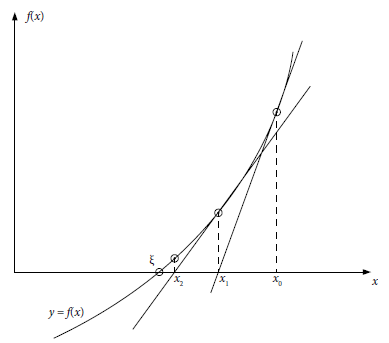

##### Zadanie 4 (2 pkt.)

Zaimplementuj poniższą funkcję `newton()`. Zwróć uwagę na funkcja ma zwrócić nie tylko wynik końcowy, ale również wartości pośrednie i pomocnicze podczas wykonywania poszczególnych iteracji algorytmu. Dodatkowo należy zaimplementować rzucenie wyjątku gdy:

* wartość pochodnej jest zbyt bliska zeru, tj. $|f'(x_i)| < \delta$ (np. `Derivative too small`),
* algorytm przekroczy maksymalną liczbę iteracji $i_{\max}$ (np. `Maximum number of iterations imax = 100 exceeded`).

Przypadek testowy:

```python
f      = lambda x: np.power(x, 3) - 2 * np.power(x, 2) + x - 3
fprime = lambda x: 3 * np.power(x, 2) - 4 * x + 1
x_init = 7.0

results = newton(f, fprime, x_init)
print(pd.DataFrame(results))
```

Oczekiwany wynik:

```plaintext
   i       x_i      f(x_i)     f'(x_i)   x_{i+1}    f(x_{i+1})
0  0  7.000000  249.000000  120.000000  4.925000  7.287270e+01
1  1  4.925000   72.872703   54.066875  3.577175  2.075898e+01
2  2  3.577175   20.758984   25.079837  2.749459  5.415008e+00
3  3  2.749459    5.415008   12.680734  2.322432  1.061532e+00
4  4  2.322432    1.061532    7.891345  2.187914  8.745025e-02
5  5  2.187914    0.087450    6.609244  2.174682  7.966701e-04
6  6  2.174682    0.000797    6.488999  2.174559  6.818941e-08
```

In [197]:
def newton(f: callable, fprime: callable, x_init: float, eps: float = 1e-6, delta: float = 1e-6, imax: int = 100) -> dict:
    """
    Perform Newton-Raphson method for finding the root of a function.

    Parameters:
        - f (callable): The function for which the root is to be found.
        - fprime (callable): The derivative of the function f.
        - x_init (float): The initial guess for the root.
        - eps (float): The tolerance for convergence, defining the precision 
                       for comparing two consecutive iterations.
        - delta (float): The tolerance for convergence, defining the level of 
                         precision at which the function value f(x) is close to zero,
                         and minimal absolute value of f'(x).
        - imax (int): The maximum number of iterations allowed.

    Returns:
        - dict: A dictionary containing the results of each iteration. The keys are the following lists:
            - "i": The iteration number.
            - "x_i": The value of x_i.
            - "f(x_i)": The value of f(x_i).
            - "f'(x_i)": The value of f'(x_i).
            - "x_{i+1}": The calculated next value of x_i, i.e. x_{i+1}.
            - "f(x_{i+1})": The value of f(x_{i+1}).

    Raises:
        - Exception: If the algorithm exceeds 'imax' limit or
                     if the derivative is too small, i.e. abs(f'(x_i)) < delta.
    """

    results = {
        "i": [],
        "x_i": [],
        "f(x_i)": [],
        "f'(x_i)": [],
        "x_{i+1}": [],
        "f(x_{i+1})": []
    }

    # UMIEŚĆ SWÓJ KOD TUTAJ
    x_i = x_init

    for i in range(imax):
        f_x = f(x_i)
        df_x = fprime(x_i)
        
        if abs(df_x) < delta:
            raise Exception("Derivative too small")

        x_next = x_i - f_x / df_x
        f_x_next = f(x_next)

        # Zapisanie wyników iteracji
        results["i"].append(i)
        results["x_i"].append(x_i)
        results["f(x_i)"].append(f_x)
        results["f'(x_i)"].append(df_x)
        results["x_{i+1}"].append(x_next)
        results["f(x_{i+1})"].append(f_x_next)

        # Warunki zakończenia iteracji
        if abs(x_next - x_i) < eps or abs(f_x_next) < delta:
            return results

        x_i = x_next  # przejście do kolejnej iteracji

        if(i >= imax): raise Exception(f"Maximum number of iterations imax = {imax} exceeded")
    return results

Po zaimplementowaniu możemy skorzystać z poniżego kodu pomocniczego, który wizualizuje kolejne kroki algorytmu:

In [198]:
def show_results_newton(f, results, title):
    def plot_newton(i, show_trace):

        x_l = min(results['x_i'])
        x_r = max(results['x_i'])
        x_margin = np.abs(x_r - x_l)*0.2

        x_all = np.linspace(x_l-x_margin, x_r+x_margin, 100)
        y_all = f(x_all)

        y_u = max(y_all)
        y_d = min(y_all)
        y_margin = np.abs(y_u - y_d)*0.1
        
        x = results['x_i'][i]
        fx = results['f(x_i)'][i]
        fp = results["f'(x_i)"][i]
        x_new = results['x_{i+1}'][i]
        fx_new = results['f(x_{i+1})'][i]
        
        plt.figure(figsize=(10, 8))
        plt.axhline(0, color='black', linewidth=0.5, zorder=1)
        plt.plot(x_all, y_all, color="black", linewidth=0.75, linestyle='--', label='$f(x)$', zorder=2)

        if show_trace and i > 0:
            for j in range(i):
                x_prev = results['x_i'][j]
                fx_prev = results['f(x_i)'][j]
                x_new_prev = results['x_{i+1}'][j]
                plt.scatter(x_prev, fx_prev, color='tab:gray', alpha=(1.0 - j/(len(results['x_i'])-1))/2, s=100, zorder=3)
                plt.plot([x_prev, x_new_prev], [fx_prev, 0], color='tab:gray', linestyle='-', linewidth=0.75, zorder=3)

        tangent_x = np.linspace(x, x_new, 100)
        tangent_y = fx + fp * (tangent_x - x)
        line_a = fp
        line_b = fx - fp * x
        line_sign = '+' if line_b >= 0 else ''
        tangent_eq = f"$y = {line_a:.2f}x {line_sign} {line_b:.2f}$"
        plt.plot(tangent_x, tangent_y, color='tab:green', linestyle='-', linewidth=1, label=f'Tangent line at $x_{{{i}}}$: {tangent_eq}', zorder=4)

        g_min, g_max = 0.0, fx_new
        if g_min > g_max:
            g_min, g_max = g_max, g_min
        plt.vlines(x=[x_new], ymin=[g_min], ymax=[g_max], color='tab:red', linewidth=0.5, linestyle='--', zorder=5)
        plt.scatter(x,     fx,     color='tab:orange', s=100, label='$(x_{'+f'{i}'+'}, f(x_{'+f'{i}'+'}))$ = '+f'({x:+.3f}, {fx:+.3f})', zorder=6)
        plt.scatter(x_new, fx_new, color='tab:red',    s=100, label='$(x_{'+f'{i+1}'+'}, f(x_{'+f'{i+1}'+'}))$ = '+f'({x_new:+.3f}, {fx_new:+.3f})', zorder=6)     

        plt.title(f'Newton-Raphson method for {title}')
        plt.xlabel('$x$')
        plt.ylabel('$f(x)$')
        plt.legend(prop=FontProperties(family='monospace'), loc='upper left', bbox_to_anchor=(1, 1))

        plt.xlim(x_l - x_margin, x_r + x_margin)
        plt.ylim(y_d - y_margin, y_u + y_margin)

        plt.show()

    i_slider = widgets.IntSlider(min=0, max=len(results['i'])-1, step=1, description='Iteration i:')
    trace_checkbox=widgets.Checkbox(value=False, description='Show trace', disabled=False, indent=True)
    interactive_plot = widgets.interactive(plot_newton, i=i_slider, show_trace=trace_checkbox)
    display(interactive_plot)

In [199]:
f      = lambda x: np.power(x, 3) - 2 * np.power(x, 2) + x - 3
fprime = lambda x: 3 * np.power(x, 2) - 4 * x + 1
x_init = 7.0

results = newton(f, fprime, x_init)
show_results_newton(f, results, "$f(x) = x^3 - 2x^2 + x - 3$")

interactive(children=(IntSlider(value=0, description='Iteration i:', max=6), Checkbox(value=False, description…

----

Zauważmy, że przy pomocy tej metody możemy np. wyliczyć aproksymację liczby $\pi$ za pomocą rozwiązania równania $\sin x=0$ startując od przybliżenia liczby $\pi$ równego $3.0$:

In [200]:
f      = np.sin
fprime = np.cos
x_init = 3.0

results = newton(f, fprime, x_init)
print(pd.DataFrame(results))

   i       x_i    f(x_i)   f'(x_i)   x_{i+1}    f(x_{i+1})
0  0  3.000000  0.141120 -0.989992  3.142547 -9.538893e-04
1  1  3.142547 -0.000954 -1.000000  3.141593  2.893162e-10


#### Metoda Müllera

W tej metodzie przybliżymy funkcję $y = f(x)$ za pomocą krzywej drugiego stopnia $p_2(x)$ w pobliżu pierwiastka. Metoda Müllera ma rząd zbieżności $p=1.84$.

Niech $x_{i-2}$, $x_{i-1}$ oraz $x_i$ będą przybliżeniami pierwiastka równania $f(x) = 0$, wtedy:

$$
y_{i-2} = f(x_{i-2}), \quad y_{i-1} = f(x_{i-1}) \quad \text{oraz} \quad y_i = f(x_i)
$$

Niech krzywa aproksymująca będzie wielomianem kwadratowym postaci:

$$
y = A(x - x_i)^2 + B(x - x_i) + C
$$

Parabola ta przechodzi przez punkty $(x_{i-2}, y_{i-2})$, $(x_{i-1}, y_{i-1})$ oraz $(x_i, y_i)$. Zatem musimy mieć:

$$
y_{i-2} = A(x_{i-2} - x_i)^2 + B(x_{i-2} - x_i) + C
$$

$$
y_{i-1} = A(x_{i-1} - x_i)^2 + B(x_{i-1} - x_i) + C
$$

$$
y_i = C
$$

Rozwiązując równania względem $A$, $B$ i $C$, otrzymujemy:

$$
A = \frac{(x_{i-1} - x_i)(y_{i-2} - y_i) - (x_{i-2} - x_i)(y_{i-1} - y_i)}{(x_i - x_{i-1})(x_{i-1} - x_{i-2})(x_{i-2} - x_i)}
$$

$$
B = \frac{(x_{i-2} - x_i)^2 (y_{i-1} - y_i) - (x_{i-1} - x_i)^2 (y_{i-2} - y_i)}{(x_i - x_{i-1})(x_{i-1} - x_{i-2})(x_{i-2} - x_i)}
$$

$$
C = y_i
$$

Możemy uzyskać wielomian kwadratowy używając wartości $A$, $B$ i $C$ z powyższych równań. Przybliżenie pierwiastka równania $f(x) = 0$ dane jest przez pierwiastek następującego równania kwadratowego:

$$
A(x - x_i)^2 + B(x - x_i) + C = 0
$$

Niech $x_{i+1}$ będzie kolejnym przybliżeniem pierwiastka, tj.:

$$
x_{i+1} - x_i = \frac{-B \pm \sqrt{B^2 - 4AC}}{2A}
$$

czyli:

$$
x_{i+1} = x_i + \frac{-2C}{B \pm \sqrt{B^2 - 4AC}}
$$

Zwróćmy uwagę, że znak w mianowniku powyższego równania jest dobierany tak, aby mianownik miał największą możliwą wartość bezwzględną. Ma to na celu zmniejszenie utraty dokładności w przybliżeniu $x_{i+1}$.

Poniższy wykres przedstawia uproszczoną ideę metody Müllera:

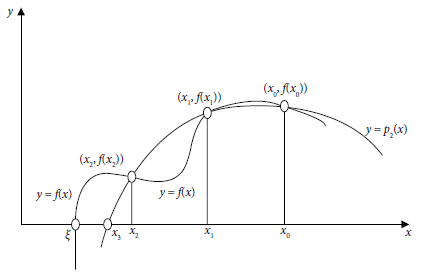

##### Zadanie 5 (2 pkt.)

Zaimplementuj poniższą funkcję `muller()`. Zwróć uwagę na funkcja ma zwrócić nie tylko wynik końcowy, ale również wartości pośrednie i pomocnicze podczas wykonywania poszczególnych iteracji algorytmu; tym razem wartość $i$ zaczyna się od $3$, a nie od $0$. Dodatkowo należy zaimplementować rzucenie wyjątku gdy:

* algorytm przekroczy maksymalną liczbę iteracji $i_{\max}$ (np. `Maximum number of iterations imax = 100 exceeded`).

Przypadek testowy:

```python
f    = lambda x: np.power(x, 3) - 8 * np.power(x, 2) + 19 * x - 12
x_0  = 1.5
x_1  = 2.5
x_2  = 3.5

results = muller(f, x_0, x_1, x_2)
print(pd.DataFrame(results))
```

Oczekiwany wynik:

```plaintext
   i   x_{i-2}  f(x_{i-2})   x_{i-1}  f(x_{i-1})       x_i     f(x_i)         A          B          C   x_{i+1}    f(x_{i+1})
0  3  1.500000    1.875000  2.500000    1.125000  3.500000  -0.625000 -0.500000  -2.250000  -0.625000 -0.702562 -2.964422e+01
1  4  2.500000    1.125000  3.500000   -0.625000 -0.702562 -29.644218 -2.702562  18.262812 -29.644218  2.007406  1.992485e+00
2  5  3.500000   -0.625000 -0.702562  -29.644218  2.007406   1.992485 -3.195156   3.015423   1.992485  1.559356  1.966751e+00
3  6 -0.702562  -29.644218  2.007406    1.992485  1.559356   1.966751 -5.135800   2.358531   1.966751  1.128917  6.925477e-01
4  7  2.007406    1.992485  1.559356    1.966751  1.128917   0.692548 -3.304321   4.382551   0.692548  0.986241 -8.350014e-02
5  8  1.559356    1.966751  1.128917    0.692548  0.986241  -0.083500 -4.325485   6.056383  -0.083500  1.000167  1.002584e-03
6  9  1.128917    0.692548  0.986241   -0.083500  1.000167   0.001003 -4.884674   6.000122   0.001003  1.000000  2.963368e-07
```

In [201]:
def muller(f: callable, x_0: float, x_1: float, x_2: float, eps: float = 1e-6, delta: float = 1e-6, imax: int = 100) -> dict:
    """
    Perform Müller's method for finding the root of a function.

    Parameters:
        - f (callable): The function for which the root is to be found.
        - x_0 (float): The initial guess for the root; the left point for parabola.
        - x_1 (float): The initial guess for the root; the middle point for parabola.
        - x_2 (float): The initial guess for the root; the right point for parabola.
        - eps (float): The tolerance for convergence, defining the precision 
                       for comparing two consecutive iterations.
        - delta (float): The tolerance for convergence, defining the level of 
                         precision at which the function value f(x) is close to zero.
        - imax (int): The maximum number of iterations allowed.

    Returns:
        - dict: A dictionary containing the results of each iteration. The keys are the following lists:
            - "i": The iteration number.
            - "x_{i-2}": The left point used for parabola calculation.
            - "f(x_{i-2})": The value of f(x_{i-2}).
            - "x_{i-1}": The middle point used for parabola calculation.
            - "f(x_{i-1})": The value of f(x_{i-1}).
            - "x_i": The right point used for parabola calculation.
            - "f(x_i)": The value of f(x_i).
            - "A": Coefficient A of the quadratic approximation.
            - "B": Coefficient B of the quadratic approximation.
            - "C": Coefficient C of the quadratic approximation.
            - "x_{i+1}": The value of next x_{i+1}.
            - "f(x_{i+1})": The value of f(x_{i+1}).
    """
    
    results = {
        "i": [],
        "x_{i-2}": [],
        "f(x_{i-2})": [],
        "x_{i-1}": [],
        "f(x_{i-1})": [],
        "x_i": [],
        "f(x_i)": [],
        "A": [],
        "B": [],
        "C": [],
        "x_{i+1}": [],
        "f(x_{i+1})": []
    }

    # UMIEŚĆ SWÓJ KOD TUTAJ

    for i in range(3, imax + 3):  # i zaczyna się od 3
        f0 = f(x_0)
        f1 = f(x_1)
        f2 = f(x_2)

        h1 = x_1 - x_0
        h2 = x_2 - x_1
        d1 = (f1 - f0) / h1
        d2 = (f2 - f1) / h2
        d = d2 - d1

        A = d / (h2 + h1)
        B = A * h2 + d2
        C = f2

        # Wyznaczenie pierwiastka z Δ
        discriminant = B**2 - 4 * A * C
        sqrt_discriminant = np.lib.scimath.sqrt(discriminant)  # obsługa liczb zespolonych

        if abs(B + sqrt_discriminant) > abs(B - sqrt_discriminant):
            denominator = B + sqrt_discriminant
        else:
            denominator = B - sqrt_discriminant

        if denominator == 0:
            raise ZeroDivisionError("Denominator in Muller's method became zero.")

        dx = -2 * C / denominator
        x_3 = x_2 + dx
        f3 = f(x_3)

        results["i"].append(i)
        results["x_{i-2}"].append(x_0)
        results["f(x_{i-2})"].append(f0)
        results["x_{i-1}"].append(x_1)
        results["f(x_{i-1})"].append(f1)
        results["x_i"].append(x_2)
        results["f(x_i)"].append(f2)
        results["A"].append(A)
        results["B"].append(B)
        results["C"].append(C)
        results["x_{i+1}"].append(x_3)
        results["f(x_{i+1})"].append(f3)

        if abs(dx) < eps or abs(f3) < delta:
            break

        x_0, x_1, x_2 = x_1, x_2, x_3

        if i - 2 >= imax:
            raise Exception(f"Maximum number of iterations imax = {imax} exceeded")
    return results

Po zaimplementowaniu możemy skorzystać z poniżego kodu pomocniczego, który wizualizuje kolejne kroki algorytmu:

In [202]:
def show_results_muller(f, results, title):
    def plot_muller(i, show_trace):
        x_min = min(results['x_{i-2}'] + results['x_{i-1}'] + results['x_i'] + results['x_{i+1}'])
        x_max = max(results['x_{i-2}'] + results['x_{i-1}'] + results['x_i'] + results['x_{i+1}'])
        x_margin = np.abs(x_max - x_min) * 0.2

        x_all = np.linspace(x_min - x_margin, x_max + x_margin, 100)
        y_all = f(x_all)

        y_u = max(y_all)
        y_d = min(y_all)
        y_margin = np.abs(y_u - y_d) * 0.1

        x_l = results['x_{i-2}'][i-3]
        x_m = results['x_{i-1}'][i-3]
        x_r = results['x_i'][i-3]
        x_m_new = results['x_{i+1}'][i-3]
        f_x_l = results['f(x_{i-2})'][i-3]
        f_x_m = results['f(x_{i-1})'][i-3]
        f_x_r = results['f(x_i)'][i-3]
        f_x_m_new = results['f(x_{i+1})'][i-3]
        a = results['A'][i-3]
        b = results['B'][i-3]
        c = results['C'][i-3]

        plt.figure(figsize=(10, 8))
        plt.axhline(0, color='black', linewidth=0.5, zorder=1)
        plt.plot(x_all, y_all, color="black", linewidth=0.75, linestyle='--', label='$f(x)$', zorder=2)

        if show_trace and i > 3:
            for j in range(3, i):
                x_m_new_prev = results['x_{i+1}'][j-3]
                plt.scatter(x_m_new_prev, results['f(x_{i+1})'][j-3], color='tab:gray', alpha=(1.0 - (j-3) / len(results['x_{i+1}']))/2, s=200, zorder=3)

        x_parabola = np.linspace(x_min - x_margin, x_max + x_margin, 100)
        y_parabola = a * (x_parabola - x_r) ** 2 + b * (x_parabola - x_r) + c
        s1 = '+' if x_r >= 0 else ''
        s2 = '+' if b >= 0 else ''
        s3 = '+' if c >= 0 else ''
        parabola_eq = f'Parabola: $y = {a:.2f}(x {s1} {x_r:.2f})^2 {s2} {b:.2f}(x {s1} {x_r:.2f}) {s3} {c:.2f}$'
        plt.plot(x_parabola, y_parabola, color='tab:green', linestyle='-', linewidth=1, label=parabola_eq, zorder=4)

        g_min, g_max = 0.0, f_x_m_new
        if g_min > g_max:
            g_min, g_max = g_max, g_min
        plt.vlines(x=[x_m_new], ymin=[g_min], ymax=[g_max], color='tab:red', linewidth=0.5, linestyle='--', zorder=5)

        plt.scatter(x_l, f_x_l, color='tab:orange',      s=100, label='$(x_{'+f'{i-2}'+'}, f(x_{'+f'{i-2}'+'}))$ = '+f'({x_l:+.3f}, {f_x_l:+.3f})', zorder=6)
        plt.scatter(x_m, f_x_m, color='tab:blue',        s=100, label='$(x_{'+f'{i-1}'+'}, f(x_{'+f'{i-1}'+'}))$ = '+f'({x_m:+.3f}, {f_x_m:+.3f})', zorder=6)
        plt.scatter(x_r, f_x_r, color='tab:purple',      s=100, label='$(x_{'+f'{i}'+'}, f(x_{'+f'{i}'+'}))$ = '+f'({x_r:+.3f}, {f_x_r:+.3f})', zorder=6)
        plt.scatter(x_m_new, f_x_m_new, color='tab:red', s=100, label='$(x_{'+f'{i+1}'+'}, f(x_{'+f'{i+1}'+'}))$ = '+f'({x_m_new:+.3f}, {f_x_m_new:+.3f})', zorder=6)

        plt.title(f'Müller method for {title}')
        plt.xlabel('$x$')
        plt.ylabel('$f(x)$')
        plt.legend(prop=FontProperties(family='monospace'), loc='upper left', bbox_to_anchor=(1, 1))

        plt.xlim(x_min - x_margin, x_max + x_margin)
        plt.ylim(y_d - y_margin, y_u + y_margin)

        plt.show()

    i_slider = widgets.IntSlider(min=3, max=len(results['i']) + 2, step=1, description='Iteration i:')
    trace_checkbox = widgets.Checkbox(value=False, description='Show trace', disabled=False, indent=True)
    interactive_plot = widgets.interactive(plot_muller, i=i_slider, show_trace=trace_checkbox)
    display(interactive_plot)

In [203]:
f    = lambda x: np.power(x, 3) - 8 * np.power(x, 2) + 19 * x - 12
x_0  = 1.5
x_1  = 2.5
x_2  = 3.5

results = muller(f, x_0, x_1, x_2)
show_results_muller(f, results, "$f(x) = x^3 - 8x^2 + 19x - 12$")

interactive(children=(IntSlider(value=3, description='Iteration i:', max=7, min=3), Checkbox(value=False, desc…

#### Biblioteka SciPy

W praktyce możemy skorzystać z gotowych implementacji SciPy dostępnych w metodzie [`scipy.optimize.root_scalar()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root_scalar.html). Poniżej znajduje się przykładowe uruchomienie dla $f(x) = x^3 - 2x^2 + x - 3$.

In [204]:
from scipy import optimize

f      = lambda x: np.power(x, 3) - 2 * np.power(x, 2) + x - 3
fprime = lambda x: 3 * np.power(x, 2) - 4 * x + 1
x_init = 7.0

sol = optimize.root_scalar(f, x0=x_init, fprime=fprime, method='newton')
sol.root, sol.iterations, sol.function_calls, sol.converged

(np.float64(2.17455941029298), 8, 16, True)

##### Zadanie 6 (2 pkt.)

Jako inwestor lokujesz 100 000 zł w kryptowalutowy fundusz algorytmiczny, który przynosi stały roczny zwrot w wysokości 8%. Wartość inwestycji w czasie, zgodnie z zapewnieniami operatora funduszu inwestycyjnego, opisana jest funkcją wykładniczą:

$$
V(x) = 100000 \cdot e^{0.08x}
$$

gdzie:

* $ V(x) $ - wartość inwestycji po $x$ latach,
* $ r = 0.08 $ - stopa zwrotu,
* $ x $ - czas w latach.

Po ilu latach Twoja inwestycja osiągnie wartość 750 000 zł, tak by móc kupić upragnione mieszkanie za gotówkę?

Użyj biblioteki SciPy i metody bisekcji. Możesz również pomocniczo wyświetlić wykresy funkcji przy pomocy Matplotlib.

Wynik zapisz jako `float()` w zmiennej `btc_result`. W notatniku Jupyter możesz go dodatkowo wypisać na standardowe wyjście.

In [205]:
# UMIEŚĆ SWÓJ KOD TUTAJ
from scipy import optimize

def f(x):
    return 100000 * np.exp(0.08 * x) - 750000

btc_result = float(optimize.bisect(f, 0, 100))

print(btc_result)

25.186287756777404


----

Literatura:

* S. Rosłoniec (2020). _Wybrane metody numeryczne z przykładami zastosowań w zadaniach inżynierskich_. Wyd. 3, Oficyna Wydawnicza Politechniki Warszawskiej.
* R. Gupta (2019). _Numerical Methods. Fundamentals and Applications_. Cambridge University Press.